In [497]:
import numpy as np
import matplotlib.pyplot as plt

In [498]:
def g0_sampler():
    return np.random.normal(0, 1)

def f_sampler(theta):
    return np.random.normal(theta, 0.1)

def F_likelihood(theta, x):
    return np.exp(-(theta - x)**2 / (2 * 0.1**2))

In [499]:
def DP_sampler(n, alpha):
    # Sample the thetas
    thetas = []
    for i in range(n):
        u = np.random.uniform()
        if u < alpha / (alpha + i):
            thetas.append(g0_sampler())
        else:
            thetas.append(thetas[np.random.randint(0, i)])
    return thetas

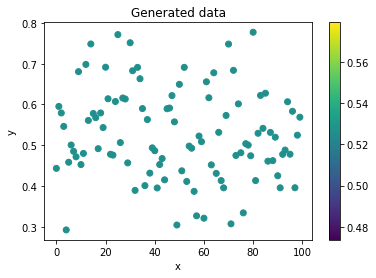

In [500]:
# Generate data
n = 100
alpha = 0.3
thetas = DP_sampler(n, alpha)
y = np.array([f_sampler(theta) for theta in thetas])

# Plot data
plt.figure()
plt.scatter(np.arange(n), y, c=thetas)
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

# Algo 8

In [501]:
def algo_8(y, N, alpha, m):
    n = len(y)
    phi = np.zeros(n + m)
    c = np.array([i + 1 for i in range(n)])

    # for _ in range(N):
    for i in range(n):
        c_minus_i = np.concatenate((c[:i], c[i + 1:]))
        print(c_minus_i)
        k_ = np.unique(c_minus_i).size
        h = k_ + m
        for j in range(1, k_ + 1):
            if np.sum(c_minus_i == j) == 0:
                max = np.max(c_minus_i)
                c_minus_i[c_minus_i == max] = j
                print(j, max)
                print(c_minus_i)
                print(phi)
                print(len(phi))
                phi[j - 1] = phi[max - 1]
                phi = np.delete(phi, max - 1)
        if c[i] in c_minus_i:
            phi[-m:] = np.array([g0_sampler() for _ in range(m)])
        else:
            c[i] = k_ + 1
            phi[-m + 1:] = np.array([g0_sampler() for _ in range(m - 1)])
        probabilities = []
        for cluster in range(len(phi) + 1):
            if cluster <= k_:
                n_occurence = np.sum(c_minus_i == cluster)
                probabilities.append(n_occurence / (n - 1 + alpha) * F_likelihood(phi[cluster - 1], y[i]))
            else:
                probabilities.append((alpha / m) / (n - 1 + alpha) * F_likelihood(phi[cluster - 1], y[i])) 
        probabilities = np.array(probabilities)
        probabilities /= np.sum(probabilities)
        c[i] = np.random.choice(len(probabilities), p=probabilities)
    for cluster in np.unique(c):
        phi[cluster] = F_likelihood(phi[cluster], np.mean(y[c == cluster]))

    return c, phi

In [502]:
N = 100
alpha = 0.25
m = 5

c, phi = algo_8(y, N, alpha, m)

# plot y coloured by theta
plt.figure()
plt.scatter(np.arange(n), y, c=c)
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]
1 100
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99  1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

IndexError: index 102 is out of bounds for axis 0 with size 102

In [ ]:
phi

105

In [ ]:
np.unique(c)

array([0, 1, 2, 3, 4])

In [ ]:
a = np.array([1, 3, 4])
b = np.array([0, 0, 3, 2])
max = np.max(a)

In [ ]:
a[a == max] = 2
a

array([1, 3, 2])

In [ ]:
b[2] = b[np.argmax(a)]
b

array([0, 0, 0, 2])

In [ ]:
np.delete(b, max)

array([0, 1, 5, 3, 4])

In [ ]:
b

array([0, 1, 5, 3, 4, 5])

In [ ]:
b

array([0, 1, 2, 3, 4, 5])